In [4]:
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision.transforms import v2
import os
from tqdm import tqdm
torch.cuda.is_available()
device = torch.device("cuda:0")

In [ ]:
# x shift from original image
# y shift from original 
# 360 degree rotations
# brightening
# blurring
# small zoom

transform = v2.Compose([
    v2.RandomRotation(180),
    v2.ColorJitter(brightness=0.2),
    v2.GaussianBlur(5, (0.1,2)),
    #v2.RandomZoomOut(side_range=(1., 1.2), p=0.5)
])

def augment(base):
    base = np.expand_dims(np.transpose(base[...,:3],(2,0,1)), axis=0)
    dataset = torch.tensor(base[...,275-100:835+100,540-100:1380+100])
    for i in tqdm(range(132)):
        x = int(np.random.uniform(-100,100))
        y = int(np.random.uniform(-100,100))
        temp = base[...,175+y:935+y,440+x:1480+x]
        dataset = torch.vstack((dataset, torch.tensor(temp)))
    for i in tqdm(range(len(dataset))):
        dataset = torch.vstack((dataset,transform(dataset[i:i+1,...]), transform(dataset[i:i+1,...])))
    dataset = v2.CenterCrop((560,840))(dataset)
    return dataset


In [ ]:
directory = "C:/Users/20pj2/Documents/Cs1430/finalproj/StellarBodies/raw_data"
# img_out = torch.empty((0,3,560,840))
# labels_out = torch.empty((0,1))
i = 0
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    img = ski.io.imread(f)
    out = augment(img)
    label = torch.ones((len(out), 1)) * i
    # img_out = torch.vstack((img_out, out))
    # labels_out = torch.vstack((labels_out, label))
    torch.save(out,f"../data/images{i}.pt")
    torch.save(label,f"../data/labels{i}.pt")
    print(f"done {i}")
    i+=1

# torch.save(img_out,"images.pt")
# torch.save(labels_out,"labels.pt")


In [ ]:
im_list = []
lable_list = []
for i in range(10):
    im_list.append(torch.load(f"../data/images{i}.pt"))
    lable_list.append(torch.load(f"../data/labels{i}.pt"))

im_list = torch.cat(im_list, 0)
lable_list = torch.cat(lable_list,0)
torch.save(im_list, "../data/images.pt")
torch.save(lable_list,"../data/labels.pt")

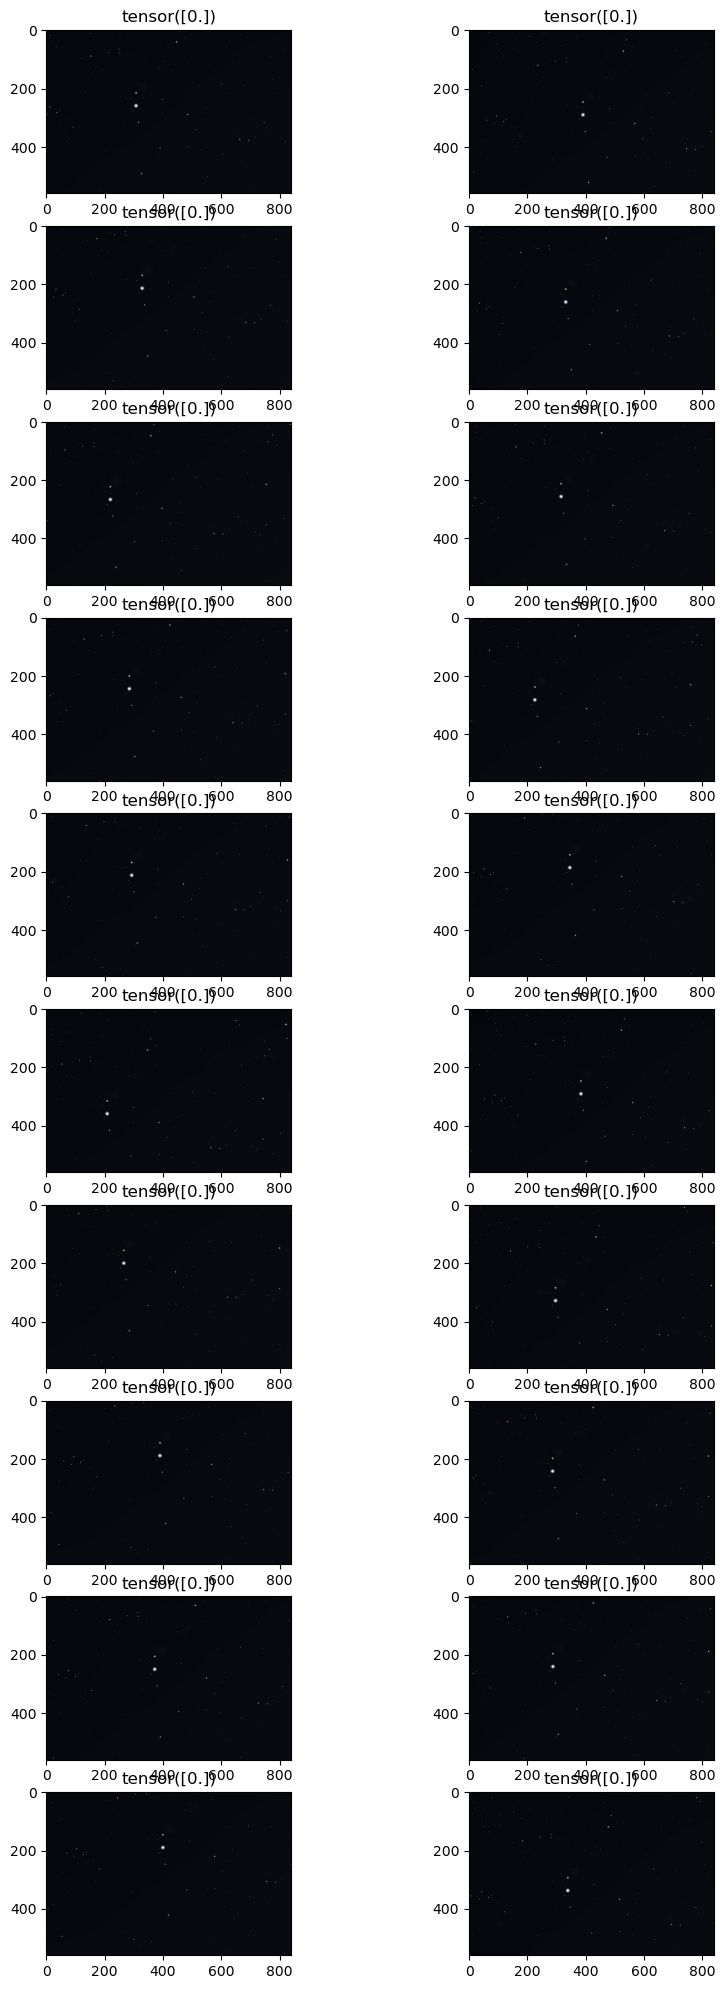

In [5]:
ims = torch.load("../data/images.pt")
labs = torch.load("../data/labels.pt")
_, axs = plt.subplots(10,2, figsize=(10, 25))
axs = axs.flatten()
for img, lab, ax in zip(ims, labs, axs):
    img = torch.permute(img,(1,2,0)).int()
    ax.imshow(img)
    ax.set_title(lab)
plt.show()